# Diversified Portfolio Notebook

## Set Up and Execute Alapaca SDK Request

### Importing the Required Libraries

In [17]:
# Import Required Libraries

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
from pathlib import Path
import matplotlib.ticker as mticker

%matplotlib inline

### Loading the .env file

In [2]:
# Make sure dotenv is loaded
load_dotenv()

True

### Alpaca API and Secret Key Variables

In [3]:
# Create Alpaca key variables to call from .env() file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

### Create the ALpaca REST Object

In [4]:
# Create our Alpaca REST object
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version="v2"
)

alpaca

### Set the Start and End Dates

In [5]:
# Set the start and end dates for the information we want to pull from Alpaca
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-05", tz="America/New_York").isoformat()

### Set the Tickers for Alpaca to Fetch

In [6]:
# Set the list of tickers we want the Alpaca request to fetch
tickers = ["VOO", "MSFT", "AAPL", "BND", "AMT", "VUG", "TSLA", "AMZN", "EDV", "PLD"]

### Set the Timeframe for the Alpaca Request

In [7]:
# Set the timeframe of collection. We just need the a daily price point
timeframe = "1D"

### Create the Request for Alpaca Using get_barset()

In [8]:
# Create the request of the data to fetch via the Alpaca SDK
diversified_prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  limit=1000,
  start=start_date,
  end=end_date
).df

diversified_prices_df

AAPL                                       AMT  \
                              open    high     low   close    volume    open   
time                                                                           
2018-01-02 00:00:00-05:00  170.160  172.30  169.26  172.26  20523941  143.11   
2018-01-03 00:00:00-05:00  172.530  174.55  171.96  172.18  23193409  141.05   
2018-01-04 00:00:00-05:00  172.540  173.47  172.08  173.02  17742231  141.44   
2018-01-05 00:00:00-05:00  173.440  175.37  173.05  174.96  18402859  140.23   
2018-01-08 00:00:00-05:00  174.310  175.61  173.93  174.34  15554212  140.66   
...                            ...     ...     ...     ...       ...     ...   
2021-11-01 00:00:00-04:00  148.985  149.70  147.80  148.99  57758481  282.83   
2021-11-02 00:00:00-04:00  148.670  151.57  148.65  150.00  61741508  282.81   
2021-11-03 00:00:00-04:00  150.370  151.97  149.82  151.49  44064848  283.72   
2021-11-04 00:00:00-04:00  151.620  152.43  150.64  150.96  49782226  281.61   
2021-11-05 00:00:00-04:00  151.810  152.20  150.06  151.24  54619968  280.94   

                                                                ...     VOO  \
                             high      low    close     volume  ...    open   
time                                                            ...           
2018-01-02 00:00:00-05:00  143.22  140.910  141.105  1391810.0  ...  246.15   
2018-01-03 00:00:00-05:00  142.50  140.860  141.570  1210542.0  ...  247.19   
2018-01-04 00:00:00-05:00  141.96  139.580  139.630  1037487.0  ...  249.27   
2018-01-05 00:00:00-05:00  140.70  139.590  140.490  1363577.0  ...  250.46   
2018-01-08 00:00:00-05:00  143.24  140.660  142.030  1350838.0  ...  251.16   
...                           ...      ...      ...        ...  ...     ...   
2021-11-01 00:00:00-04:00  283.16  276.410  282.120  1197575.0  ...  423.19   
2021-11-02 00:00:00-04:00  285.29  279.510  282.650  1300858.0  ...  423.15   
2021-11-03 00:00:00-04:00  285.42  276.465  280.660   901567.0  ...  424.14   
2021-11-04 00:00:00-04:00  283.45  277.640  279.100  1204187.0  ...  427.84   
2021-11-05 00:00:00-04:00  281.44  276.700  277.700   946849.0  ...  431.53   

                                                                   VUG  \
                             high       low     close   volume    open   
time                                                                     
2018-01-02 00:00:00-05:00  247.03  245.7361  247.0300  2235294  141.29   
2018-01-03 00:00:00-05:00  248.70  247.1800  248.5600  2354148  142.40   
2018-01-04 00:00:00-05:00  250.12  249.1700  249.6300  2314943  144.07   
2018-01-05 00:00:00-05:00  251.40  249.9500  251.2500  1752711  144.37   
2018-01-08 00:00:00-05:00  251.88  250.8700  251.7200  1929560  145.12   
...                           ...       ...       ...      ...     ...   
2021-11-01 00:00:00-04:00  423.57  421.2800  423.0100  3544932  314.71   
2021-11-02 00:00:00-04:00  424.96  423.0100  424.6500  2754466  314.16   
2021-11-03 00:00:00-04:00  427.66  423.6900  427.2682  3416764  315.47   
2021-11-04 00:00:00-04:00  429.37  427.5400  429.2900  4125822  318.30   
2021-11-05 00:00:00-04:00  432.76  429.3000  430.7400  4582963  322.38   

                                                                  
                               high       low   close     volume  
time                                                              
2018-01-02 00:00:00-05:00  142.2700  141.0524  142.25   984355.0  
2018-01-03 00:00:00-05:00  143.6600  142.4000  143.56   653690.0  
2018-01-04 00:00:00-05:00  144.3000  143.8548  143.95   703928.0  
2018-01-05 00:00:00-05:00  145.2400  144.2899  145.20  1061025.0  
2018-01-08 00:00:00-05:00  145.7300  145.0800  145.62   683662.0  
...                             ...       ...     ...        ...  
2021-11-01 00:00:00-04:00  314.8500  312.6800  314.37   577782.0  
2021-11-02 00:00:00-04:00  315.6700  314.0100  315.25   640526.0  
2021-11-03 00:00:00-04:00  3

## Calculate Closing Prices and Daily Prices/Plots

In [9]:
# Create a new empty DF that that holds only the closing prices of each stock
diversified_closing_prices_df = pd.DataFrame()

### For Loop to Access Closing Prices Only

In [10]:
# Using a for loop, for every ticker in the tickers list, select only the close price for each ticker in the prices_df DF
for ticker in tickers:
  diversified_closing_prices_df[ticker] = diversified_prices_df[ticker]["close"]

diversified_closing_prices_df

,VOO,MSFT,AAPL,BND,AMT,VUG,TSLA,AMZN,EDV,PLD
time,,,,,,,,,,
2018-01-02 00:00:00-05:00,247.0300,85.91,172.26,81.320,141.105,142.25,320.2900,1189.00,117.50,64.01
2018-01-03 00:00:00-05:00,248.5600,86.33,172.18,81.400,141.570,143.56,317.0100,1202.74,119.69,63.86
2018-01-04 00:00:00-05:00,249.6300,87.12,173.02,81.350,139.630,143.95,314.6200,1209.64,119.94,62.63
2018-01-05 00:00:00-05:00,251.2500,88.11,174.96,81.240,140.490,145.20,316.5500,1229.07,119.42,62.56
2018-01-08 00:00:00-05:00,251.7200,88.22,174.34,81.260,142.030,145.62,336.4100,1246.95,119.30,63.29
...,...,...,...,...,...,...,...,...,...,...
2021-11-01 00:00:00-04:00,423.0100,329.38,148.99,85.150,282.120,314.37,1209.4800,3317.99,138.15,144.74
2021-11-02 00:00:00-04:00,424.6500,333.26,150.00,85.335,282.650,315.25,1171.8500,3313.17,139.05,147.01
2021-11-03 00:00:00-04:00,427.2682,333.98,151.49,85.160,280.660,317.47,1213.6880,3384.00,137.16,147.68


### Calculate the Daily Returns Per Stock in our Stock Portfolio

In [11]:
# Calculate the daily returns for every stock in the Diversified Portfolio
per_diversified_daily_returns = diversified_closing_prices_df.pct_change().dropna()
per_diversified_daily_returns

,VOO,MSFT,AAPL,BND,AMT,VUG,TSLA,AMZN,EDV,PLD
time,,,,,,,,,,
2018-01-03 00:00:00-05:00,0.006194,0.004889,-0.000464,0.000984,0.003295,0.009209,-0.010241,0.011556,0.018638,-0.002343
2018-01-04 00:00:00-05:00,0.004305,0.009151,0.004879,-0.000614,-0.013703,0.002717,-0.007539,0.005737,0.002089,-0.019261
2018-01-05 00:00:00-05:00,0.006490,0.011364,0.011213,-0.001352,0.006159,0.008684,0.006134,0.016063,-0.004336,-0.001118
2018-01-08 00:00:00-05:00,0.001871,0.001248,-0.003544,0.000246,0.010962,0.002893,0.062739,0.014548,-0.001005,0.011669
2018-01-09 00:00:00-05:00,0.002225,0.000113,-0.000057,-0.002892,-0.007393,0.002129,-0.008085,0.004948,-0.033697,-0.009954
...,...,...,...,...,...,...,...,...,...,...
2021-11-01 00:00:00-04:00,0.002061,-0.006815,-0.005407,-0.002225,0.001455,0.000573,0.085534,-0.016143,-0.010103,-0.000828
2021-11-02 00:00:00-04:00,0.003877,0.011780,0.006779,0.002173,0.001879,0.002799,-0.031113,-0.001453,0.006515,0.015683
2021-11-03 00:00:00-04:00,0.006166,0.002160,0.009933,-0.002051,-0.007041,0.007042,0.035703,0.021378,-0.013592,0.004558


### Calculate Aggregate Daily Returns for Portfolio

In [12]:
# Calculate the daily returns for of the Stock Portfolio
diversified_daily_returns_df = diversified_closing_prices_df.sum(axis=1).pct_change().dropna()
diversified_daily_returns_df

time
2018-01-03 00:00:00-05:00    0.006336
2018-01-04 00:00:00-05:00    0.001797
2018-01-05 00:00:00-05:00    0.010583
2018-01-08 00:00:00-05:00    0.015444
2018-01-09 00:00:00-05:00   -0.000610
                               ...   
2021-11-01 00:00:00-04:00    0.005905
2021-11-02 00:00:00-04:00   -0.004873
2021-11-03 00:00:00-04:00    0.018285
2021-11-04 00:00:00-04:00    0.018110
2021-11-05 00:00:00-04:00    0.005073
Length: 969, dtype: float64

### Plot the Aggregated Daily Returns

<AxesSubplot:title={'center':'Daily Returns - Diversified Portfolio (Jan. 2018 - Nov. 2021)'}, xlabel='time'>

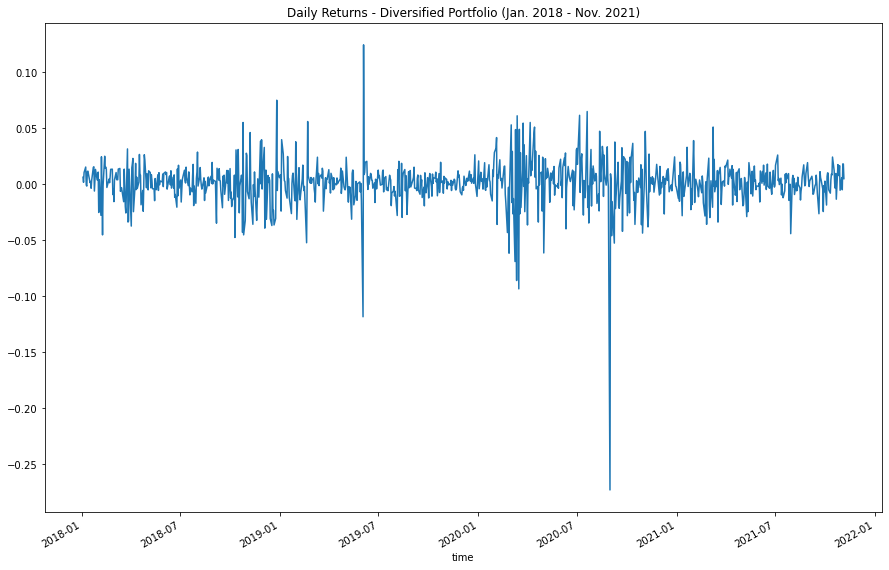

In [16]:
# Plot daily returns for the stocks portfolio
diversified_daily_returns_df.plot(figsize=(15,10), title="Daily Returns - Diversified Portfolio (Jan. 2018 - Nov. 2021)")

## Calculate the Cumulative Returns of the Portfolio

In [14]:
# Calculate Cumulative Returns for Diversified Portfolio
diversified_cumulative_returns_df = (1 + diversified_daily_returns_df).cumprod() - 1
diversified_cumulative_returns_df

time
2018-01-03 00:00:00-05:00    0.006336
2018-01-04 00:00:00-05:00    0.008144
2018-01-05 00:00:00-05:00    0.018813
2018-01-08 00:00:00-05:00    0.034548
2018-01-09 00:00:00-05:00    0.033917
                               ...   
2021-11-01 00:00:00-04:00    1.496756
2021-11-02 00:00:00-04:00    1.484589
2021-11-03 00:00:00-04:00    1.530019
2021-11-04 00:00:00-04:00    1.575836
2021-11-05 00:00:00-04:00    1.588904
Length: 969, dtype: float64

### Read the Cumulative Returns Series into a CSV

In [15]:
# Read the Cumulative Returns Series into a CSV
diversified_cumulative_returns_df.to_csv(Path("../data/cum_returns_diversified.csv"))

### Plot Cumulative Returns for Portfolio

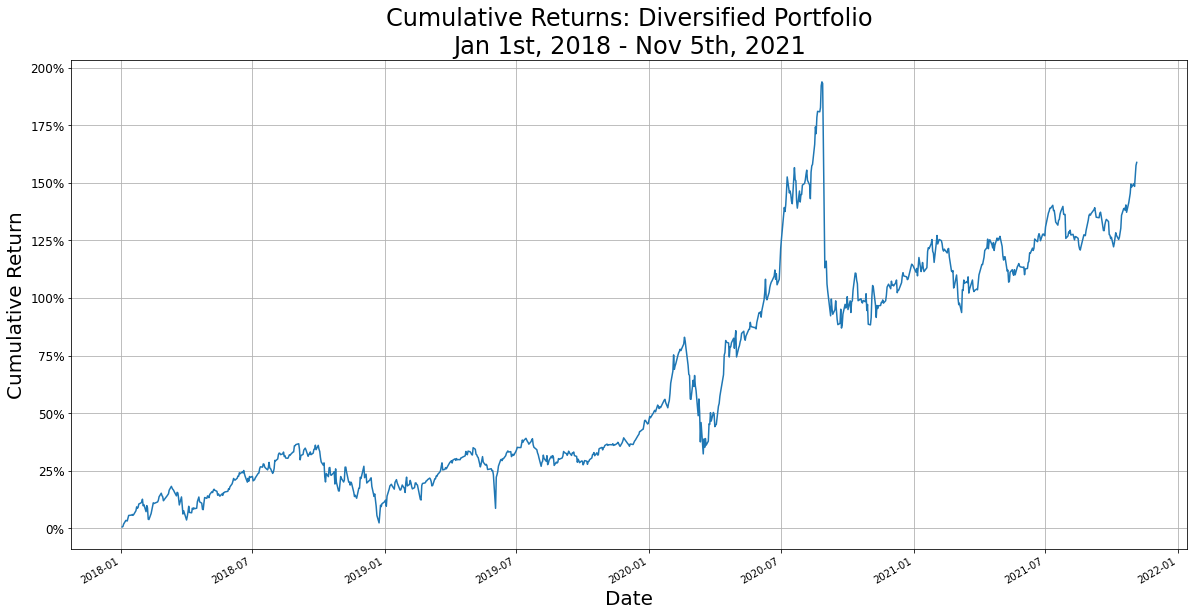

In [18]:
# Plot Cumulative Returns for Diversified Portfolio
diversified_cumulative_returns_plot = diversified_cumulative_returns_df.plot(title="Cumulative Returns: Diversified Portfolio\n"
"Jan 1st, 2018 - Nov 5th, 2021",
figsize=(20,10)
)

# Format Title
title = diversified_cumulative_returns_plot.get_title()
diversified_cumulative_returns_plot.set_title(title, fontdict={"fontsize":24})

# Format axes
diversified_cumulative_returns_plot.set_xlabel("Date", fontdict={"fontsize":20})
diversified_cumulative_returns_plot.set_ylabel("Cumulative Return", fontdict={"fontsize":20})
yticks_loc = diversified_cumulative_returns_plot.get_yticks().tolist()
diversified_cumulative_returns_plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
diversified_cumulative_returns_plot.set_yticklabels(["{:,.0%}".format(x) for x in yticks_loc], fontdict={"fontsize":12})

diversified_cumulative_returns_plot.grid()

### Analyze the Volatility

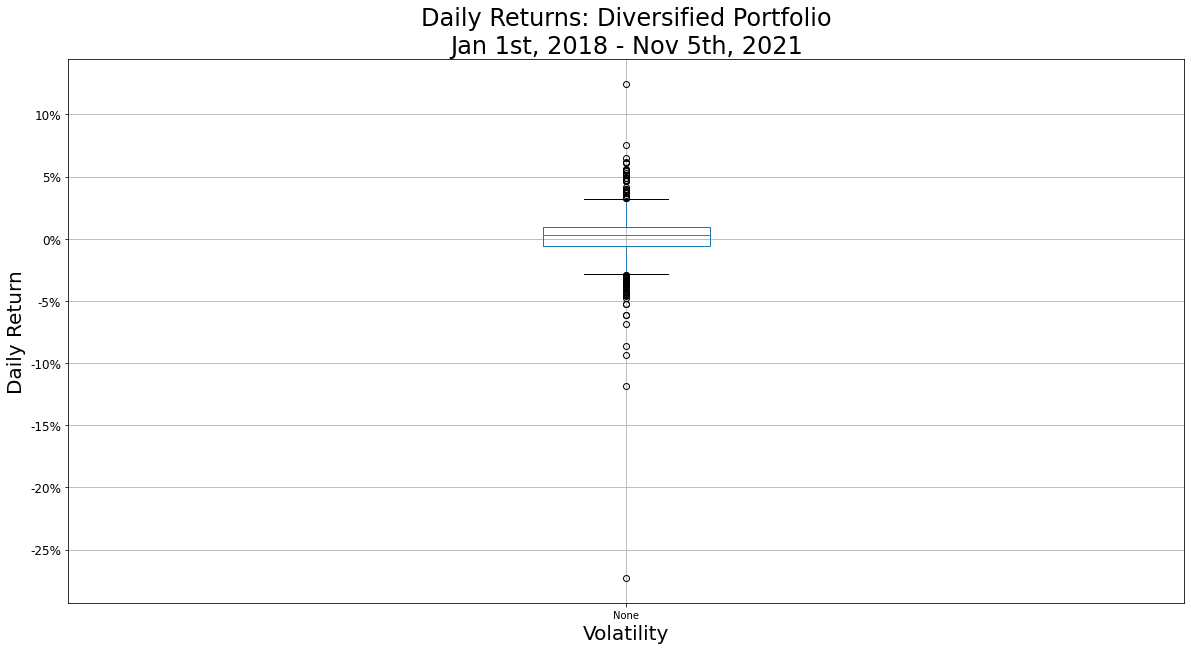

In [19]:
# Volatility Plot for Stock Portfolio
diversified_volatility_plot = diversified_daily_returns_df.plot.box(title="Daily Returns: Diversified Portfolio\n"
"Jan 1st, 2018 - Nov 5th, 2021",
figsize=(20,10)
)

# Format Title
title = diversified_volatility_plot.get_title()
diversified_volatility_plot.set_title(title, fontdict={"fontsize":24})

# Format axes
diversified_volatility_plot.set_xlabel("Volatility", fontdict={"fontsize":20})
diversified_volatility_plot.set_ylabel("Daily Return", fontdict={"fontsize":20})
yticks_loc = diversified_volatility_plot.get_yticks().tolist()
diversified_volatility_plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
diversified_volatility_plot.set_yticklabels(["{:,.0%}".format(x) for x in yticks_loc], fontdict={"fontsize":12})

diversified_volatility_plot.grid()

## Set Up and Run Monte Carlo Simulation for 10 Years

In [20]:
# Set up Monte Carlo Simulation for a 10 year time period with a $10,000 initial investment
MC_diversified_ten_year = MCSimulation(
  portfolio_data=diversified_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 10
)

MC_diversified_ten_year.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-01-02 00:00:00-05:00  170.16  172.30  169.26  172.26  20523941   
2018-01-03 00:00:00-05:00  172.53  174.55  171.96  172.18  23193409   
2018-01-04 00:00:00-05:00  172.54  173.47  172.08  173.02  17742231   
2018-01-05 00:00:00-05:00  173.44  175.37  173.05  174.96  18402859   
2018-01-08 00:00:00-05:00  174.31  175.61  173.93  174.34  15554212   

                                           AMT                           ...  \
                          daily_return    open    high     low    close  ...   
time                                                                     ...   
2018-01-02 00:00:00-05:00          NaN  143.11  143.22  140.91  141.105  ...   
2018-01-03 00:00:00-05:00    -0.000464  141.05  142.50  140.86  141.570  ...   
2018-01-04 00:00:00-05:00     0.004879  141.44  141.96  139.58  139.630  ...   
2018-01-05 00:00:00-05:00     0.011213  140.23  140.70  139.59  140.490  ...   
2018-01-08 00:00:00-05:00    -0.003544  140.66  143.24  140.66  142.030  ...   

                                VOO                                   VUG  \
                                low   close   volume daily_return    open   
time                                                                        
2018-01-02 00:00:00-05:00  245.7361  247.03  2235294          NaN  141.29   
2018-01-03 00:00:00-05:00  247.1800  248.56  2354148     0.006194  142.40   
2018-01-04 00:00:00-05:00  249.1700  249.63  2314943     0.004305  144.07   
2018-01-05 00:00:00-05:00  249.9500  251.25  1752711     0.006490  144.37   
2018-01-08 00:00:00-05:00  250.8700  251.72  1929560     0.001871  145.12   

                                                                             
                             high       low   close     volume daily_return  
time                                                                         
2018-01-02 00:00:00-05:00  142.27  141.0524  142.25   984355.0          NaN  
2018-01-03 00:00:00-05:00  143.66  142.4000  143.56   653690.0     0.009209  
2018-01-04 00:00:00-05:00  144.30  143.8548  143.95   703928.0     0.002717  
2018-01-05 00:00:00-05:00  145.24  144.2899  145.20  1061025.0     0.008684  
2018-01-08 00:00:00-05:00  145.73  145.0800  145.62   683662.0     0.002893  

[5 rows x 60 columns]

### Run the MC Simulation for 10 Years

In [21]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_diversified_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991910,1.009788,1.007121,1.008298,0.982549,0.990412,0.988899,1.000166,1.004976,1.002018,...,1.000787,0.991322,0.993589,0.998789,1.000616,0.984959,1.000135,0.996383,1.009103,1.003769
2,0.983732,0.999932,1.010698,1.007164,0.980733,0.988821,0.992123,1.005512,1.003721,0.993889,...,0.997685,1.000702,0.987659,0.989046,1.006456,0.991089,0.998429,0.991317,0.995715,1.006499
3,0.985744,1.009299,1.009396,1.000261,0.982069,0.988709,0.993301,1.016661,1.011259,0.989344,...,1.002928,1.007105,0.986453,0.995216,1.000405,0.989650,1.011132,1.005607,1.003028,1.006126
4,0.987406,1.002165,1.010712,1.007069,0.982282,1.010840,0.993106,1.011908,1.018436,0.999879,...,1.001546,1.012409,0.985447,0.994514,0.991599,0.986886,1.024388,1.005812,1.001934,1.002700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.391886,17.085299,24.204800,9.070354,9.382993,25.725938,15.029056,17.704827,27.029874,14.520906,...,7.738200,25.115384,6.986232,14.274452,8.397987,12.306107,17.190788,11.850652,8.036284,14.816072
2517,7.423173,17.172348,24.113420,9.101077,9.404410,25.795909,15.084917,17.468127,26.824863,14.431400,...,7.724295,25.345792,7.008243,14.351215,8.377247,12.263184,17.442180,11.974645,8.029413,14.860536
2518,7.485228,17.068084,24.103978,9.075563,9.415097,25.652106,15.274498,17.488244,26.494351,14.425826,...,7.688619,25.433148,6.971375,14.506697,8.336855,12.369764,17.336231,11.823907,8.057442,14.860314
2519,7.511038,17.125044,24.452502,9.120435,9.448984,25.482507,15.380460,17.529797,26.284349,14.359897,...,7.660739,25.570177,6.962495,14.531394,8.445489,12.496976,17.067269,11.918297,8.083056,14.899337


### Plot the MC 10 Year Simulation Visualization

<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

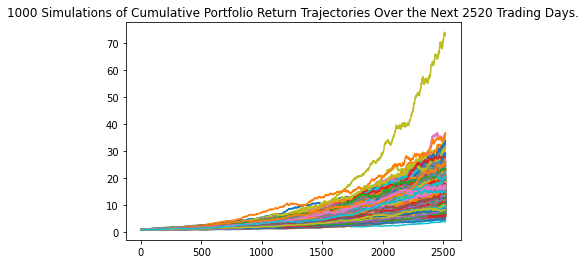

In [22]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot for the diversified portfolio
MC_diversified_ten_year.plot_simulation()

### Plot the MC 10 Year Simulation Distribution Visualization 

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

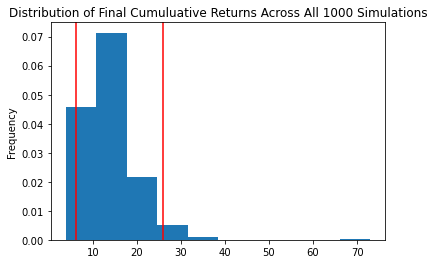

In [23]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_diversified_ten_year.plot_distribution()

### Generate MC 10 Year Simulation Summary Statistics

In [24]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_diversified_ten_year_summary_statistics = MC_diversified_ten_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_diversified_ten_year_summary_statistics)

count           1000.000000
mean              13.834737
std                5.505105
min                3.856505
25%               10.021135
50%               12.689257
75%               16.651707
max               72.951814
95% CI Lower       6.277061
95% CI Upper      25.846847
Name: 2520, dtype: float64


### Calculate the Confidence Intervals to the 95% for the 10 year Simulation on a $10,000 initial investment

In [25]:
# Calculate the 10-year confidence interval lower and upper projections for a $10,000 initial investment
diversified_ten_year_lower_ci = round(MC_diversified_ten_year_summary_statistics[8]*10000, 2)
diversified_ten_year_upper_ci = round(MC_diversified_ten_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of ${diversified_ten_year_lower_ci} and ${diversified_ten_year_upper_ci}")

With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of $62770.61 and $258468.47


## Set Up and Run Monte Carlo Simulation for 30 Years

In [ ]:
# Set up Monte Carlo Simulation for a 30 year time period with a $10,000 initial investment in our Diversified Portfolio
MC_diversified_thirty_year = MCSimulation(
  portfolio_data=diversified_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 30
)

MC_diversified_thirty_year.portfolio_data.head()

### Run the MC Simulation for 30 Years

In [ ]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns for our Diversified Portfolio
MC_diversified_thirty_year.calc_cumulative_return()

### Plot the MC 30 Year Simulation Visualization

In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_diversified_thirty_year.plot_simulation()

### Plot the MC 30 Year Simulation Distribution Visualization

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_diversified_thirty_year.plot_distribution()

### Generate MC 30 Year Simulation Summary Statistics

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_diversified_thirty_year_summary_statistics = MC_diversified_thirty_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_diversified_thirty_year_summary_statistics)

### Calculate the Confidence Intervals to the 95% for the 30 year Simulation on a $10,000 initial investment

In [ ]:
# Calculate the 10-year confidence interval lower and upper projections for a $10,000 initial investment
diversified_thirty_year_lower_ci = round(MC_diversified_thirty_year_summary_statistics[8]*10000, 2)
diversified_thirty_year_upper_ci = round(MC_diversified_thirty_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of ${diversified_thirty_year_lower_ci} and ${diversified_thirty_year_upper_ci}")

## Calculate the Standard Deviation & Annualized Standard Deviation for Our Stock Portfolio

In [ ]:
# Calculate Standard Deviation for our Stock Portfolio
diversified_standard_deviation = per_diversified_daily_returns.std()
diversified_standard_deviation = diversified_standard_deviation.sort_values()
diversified_standard_deviation

### Calculate Annualized Standard Deviation

In [ ]:
# Calculate Annualized Standard Deviation for our Stock Portfolio
diversified_annualized_standard_deviation = diversified_standard_deviation * np.sqrt(252)
diversified_annualized_standard_deviation = diversified_annualized_standard_deviation.sort_values()
diversified_annualized_standard_deviation

## Calculate the Sharpe Ratio for our Stock Portfolio

### Calculate the Annualized Returns

In [ ]:
# Calculate the Annualized Returns for our Stock Portfolio 
diversified_annualized_returns = per_diversified_daily_returns.mean() * 252
diversified_annualized_returns = diversified_annualized_returns.sort_values()
diversified_annualized_returns

### Calculate the Sharpe Ratio

In [ ]:
# Calculate the Sharpe Ratio for Our Stock Portfolio
diversified_portfolio_sharpe_ratio = diversified_annualized_returns / diversified_annualized_standard_deviation
diversified_portfolio_sharpe_ratio = diversified_portfolio_sharpe_ratio.sort_values()
diversified_portfolio_sharpe_ratio

### Calculate the Overall Sharpe Ratio for our Diversified Portfolio

In [ ]:
# Calculate the Average Sharpe Ratio for our Diversified Portfolio
diversified_portfolio_average_sharpe_ratio = diversified_portfolio_sharpe_ratio.mean()
print(f"{diversified_portfolio_average_sharpe_ratio: .3f}")